## 피파 온라인4 선수 분석

### 패키지 설치 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

df = pd.read_excel('player_data_fifa_online.xlsx')

### 한글 깨짐 현상 해결

In [2]:
import platform
if platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': # linux (Google Colab)
    #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    #!mv malgun.ttf /usr/share/fonts/truetype/
    #import matplotlib.font_manager as fm
    #fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [3]:
df.head()

,class,name,position,overall,birth,height,weight,physical,skill,foot,...,GK 핸들링,GK 킥,GK 반응속도,GK 위치선정,클래스_이름_포지션_오버롤,오버롤_다이빙,오버롤_핸들링,오버롤_킥,오버롤_반응속도,오버롤_위치선정
0,19,티아구 실바,CB,96,1984.09.22 (39세),183cm,79kg,보통,★★☆☆☆☆,L3 – R5,...,19,12,17,16,19_티아구 실바_CB_96,NaN,NaN,NaN,NaN,NaN
1,19,아스필리쿠에타,RB,90,1989.08.28 (34세),178cm,77kg,보통,★★☆☆☆☆,L3 – R5,...,9,10,5,6,19_아스필리쿠에타_RB_90,NaN,NaN,NaN,NaN,NaN
2,19,마르코스 알론소,LB,87,1990.12.28 (33세),188cm,85kg,마름,★★★☆☆☆,L5 – R3,...,7,13,12,9,19_마르코스 알론소_LB_87,NaN,NaN,NaN,NaN,NaN
3,19,로스 바클리,CAM,74,1993.12.05 (30세),186cm,87kg,보통,★★★★☆☆,L5 – R5,...,14,12,10,6,19_로스 바클리_CAM_74,NaN,NaN,NaN,NaN,NaN
4,19,안토니오 뤼디거,CB,81,1993.03.03 (30세),190cm,85kg,마름,★★☆☆☆☆,L3 – R5,...,15,10,8,12,19_안토니오 뤼디거_CB_81,NaN,NaN,NaN,NaN,NaN


In [ ]:
global selected_class
global selected_position
global selected_position_detail
global selected_player

while "the answer is invalid":
    reply = str(input("분석을 원하는 클래스를 입력해 주세요 (19/20/21) "))
    if reply in (['19', '20', '21']):
        selected_class = reply
        break

while "the answer is invalid":
    reply = str(input("분석을 원하는 포지션을 입력해 주세요 (forward/midfielder/defender/goalkeeper) "))
    if reply in (['forward', 'midfielder', 'defender', 'goalkeeper']):
        if reply == 'forward':
            selected_position = 'forward'
            selected_position_detail = pd.Series(['ST', 'RS', 'LS', 'LW', 'RW', 'CF', 'LF', 'RF'])
        elif reply == 'midfielder':
            selected_position = 'midfielder'
            selected_position_detail = pd.Series(['CM', 'RCM', 'LCM', 'CAM', 'RAM', 'LAM', 'CDM', 'RDM', 'LDM', 'LM', 'RM'])
        elif reply == 'defender':
            selected_position = 'defender'
            selected_position_detail = pd.Series(['SW', 'CB', 'RCB', 'LCB', 'RB', 'LB', 'RWB', 'LWB'])
        elif reply == 'goalkeeper':
            selected_position = 'goalkeeper'
            selected_position_detail = pd.Series(['GK'])
        break

while "the answer is invalid":
    reply = str(input("분석을 원하는 선수를 입력해 주세요 "))
    if reply in df['name'].values:
        selected_player = reply
        break

분석을 원하는 선수를 입력해 주세요 d
<class 'str'>
분석을 원하는 선수를 입력해 주세요 티아구 실바
<class 'str'>
1


### Hexagon Analysis

방사형 그래프를 활용하여 각 포지션에 적합한 선수인지 스텟 밸런스를 시각화 해봅시다.

In [179]:
player_df = pd.DataFrame()

for i in range(len(df)):
    player = pd.DataFrame({
        '이름': df.iloc[i]['name'],
        '스피드': df.iloc[i]['오버롤_스피드'],
        '슛': df.iloc[i]['오버롤_슛'],
        '패스': df.iloc[i]['오버롤_패스'],
        '드리블': df.iloc[i]['오버롤_드리블'],
        '수비': df.iloc[i]['오버롤_수비'],
        '피지컬': df.iloc[i]['오버롤_피지컬'],
    }, index = [i])
    goalkeeper = pd.DataFrame({
        '이름': df.iloc[i]['name'],
        '다이빙': df.iloc[i]['오버롤_다이빙'],
        '핸들링': df.iloc[i]['오버롤_핸들링'],
        '킥': df.iloc[i]['오버롤_킥'],
        '반응속도': df.iloc[i]['오버롤_반응속도'],
        '스피드': df.iloc[i]['오버롤_스피드'],
        '위치선정': df.iloc[i]['오버롤_위치선정'],
    }, index = [i])

    if df['position'].isin(selected_position_detail)[i] and str(df.iloc[i]['class']) == selected_class:
        if selected_position == 'goalkeeper':
            player_df = player_df.append(goalkeeper)
        else:
            player_df = player_df.append(player)

player_df.reset_index(drop=['index'], inplace=True)

/var/folders/h2/d_8w1dn529x4jxnf4pbftv2r0000gp/T/ipykernel_95345/2878416824.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_df = player_df.append(player)
/var/folders/h2/d_8w1dn529x4jxnf4pbftv2r0000gp/T/ipykernel_95345/2878416824.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_df = player_df.append(player)
/var/folders/h2/d_8w1dn529x4jxnf4pbftv2r0000gp/T/ipykernel_95345/2878416824.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_df = player_df.append(player)


In [180]:
player_df.head()

,이름,스피드,슛,패스,드리블,수비,피지컬
0,티모 베르너,106,96.0,79.0,94.0,40.0,82.0
1,크리스천 풀리식,98,81.0,82.0,95.0,49.0,73.0
2,C. 허드슨-오도이,93,71.0,76.0,87.0,31.0,66.0


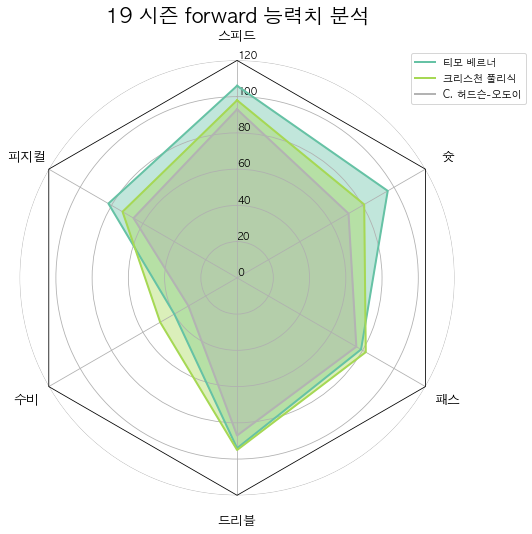

In [181]:
labels = player_df.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]

my_palette = plt.cm.get_cmap("Set2", len(player_df.index))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in player_df.iterrows():
    color = my_palette(i)
    data = player_df.iloc[i].drop('이름').tolist()
    data += data[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels, fontsize=13)
    ax.tick_params(axis='x', which='major', pad=15)
    ax.set_rlabel_position(0)
    plt.yticks([0,20,40,60,80,100,120],['0','20','40','60','80','100','120'], fontsize=10)
    plt.ylim(0,120)

    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.이름)
    ax.fill(angles, data, color=color, alpha=0.4)

for g in ax.yaxis.get_gridlines():
    g.get_path()._interpolation_steps = len(labels)

spine = Spine(axes=ax,
              spine_type='circle',
              path=Path.unit_regular_polygon(len(labels)))

spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
ax.spines = {'polar':spine}

title = [selected_class, '시즌', selected_position, '능력치 분석']
plt.title(" ".join(title), position=(0.5, 1.0), fontsize=20)
plt.legend(loc=(0.9,0.9))
plt.show()